<a href="https://colab.research.google.com/github/klinkzsweet/PCVK_Genap_2023/blob/main/TaskWeek11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image

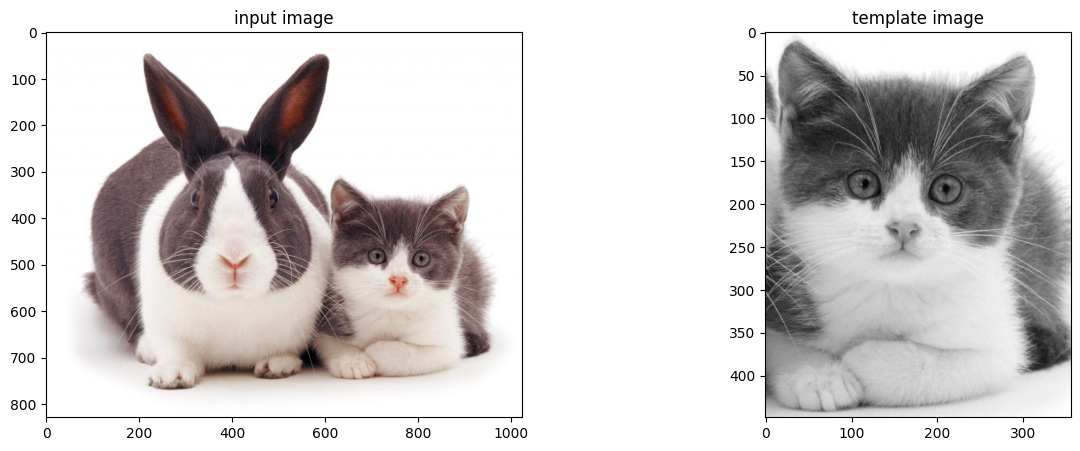

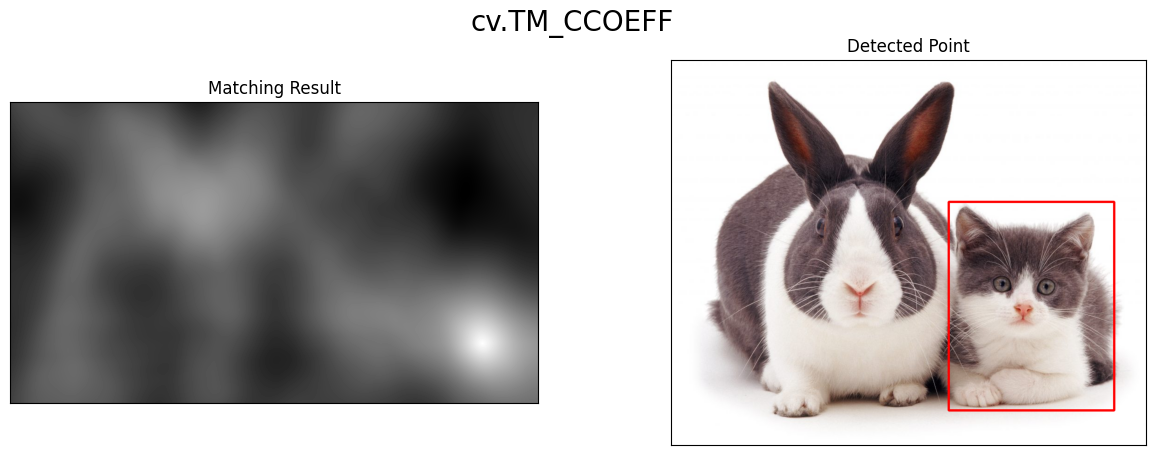

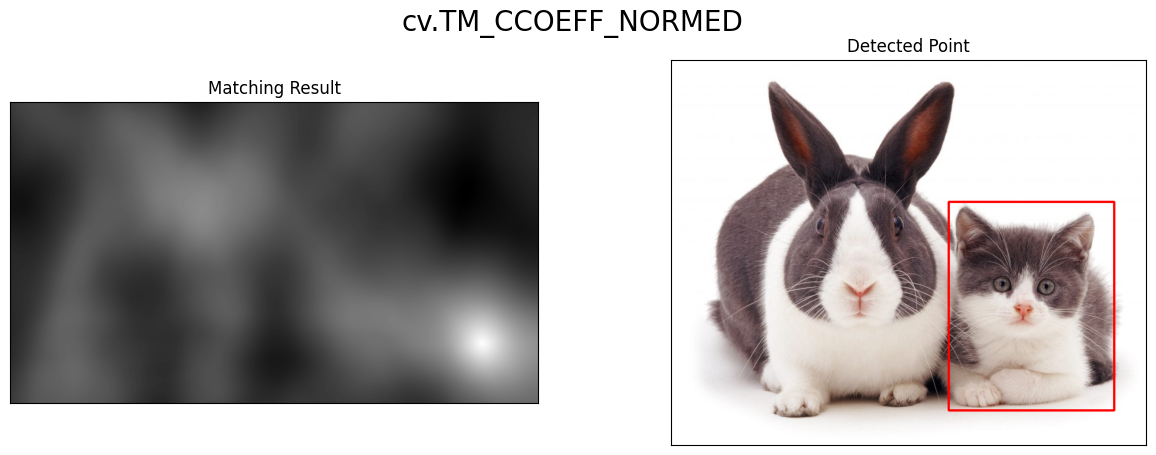

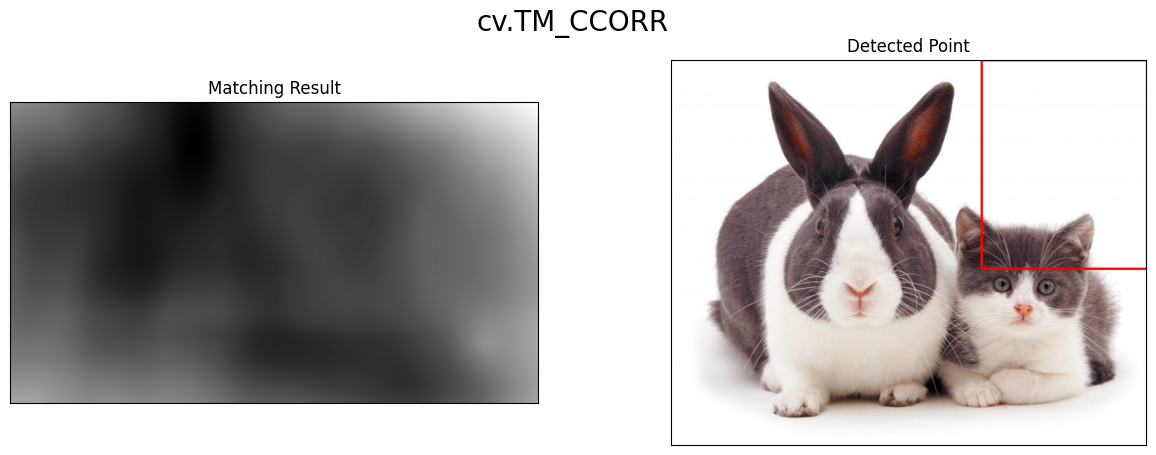

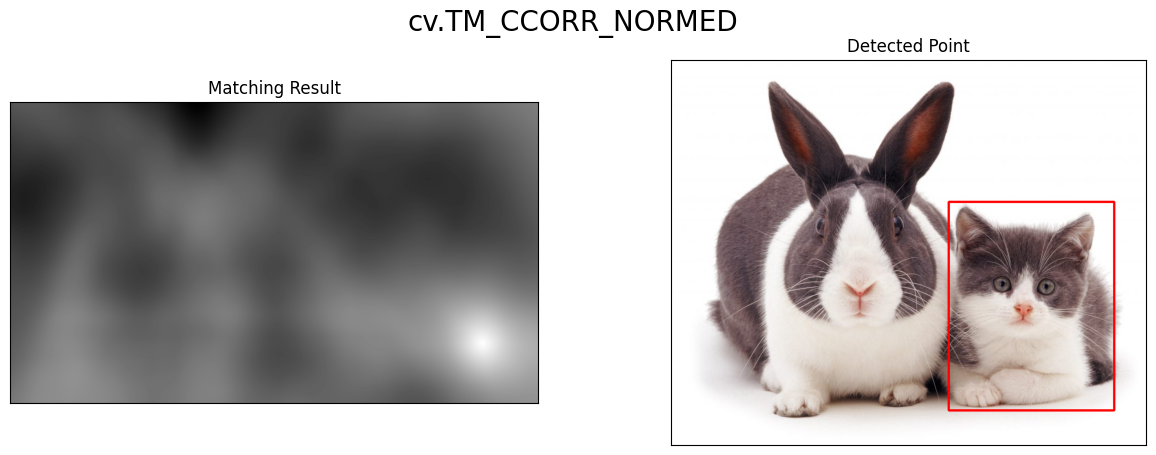

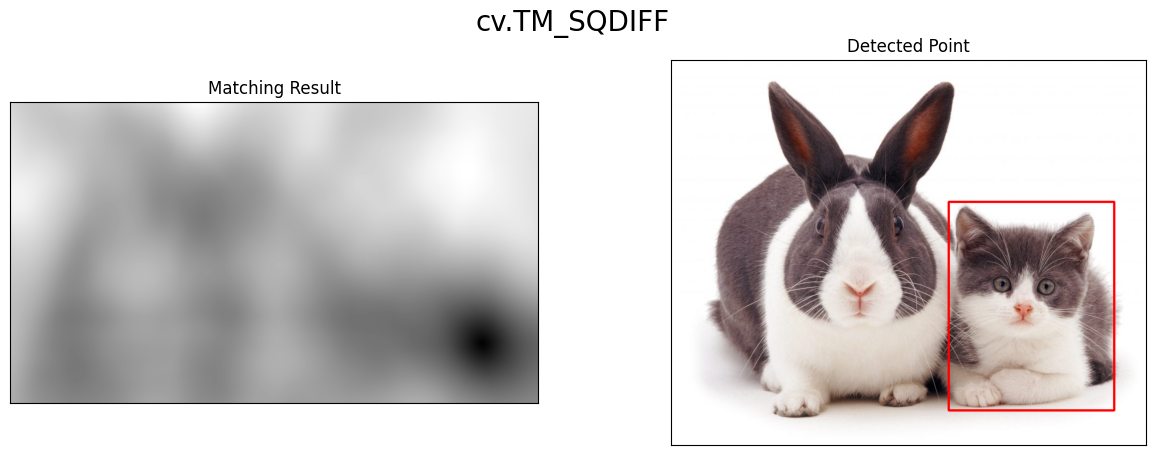

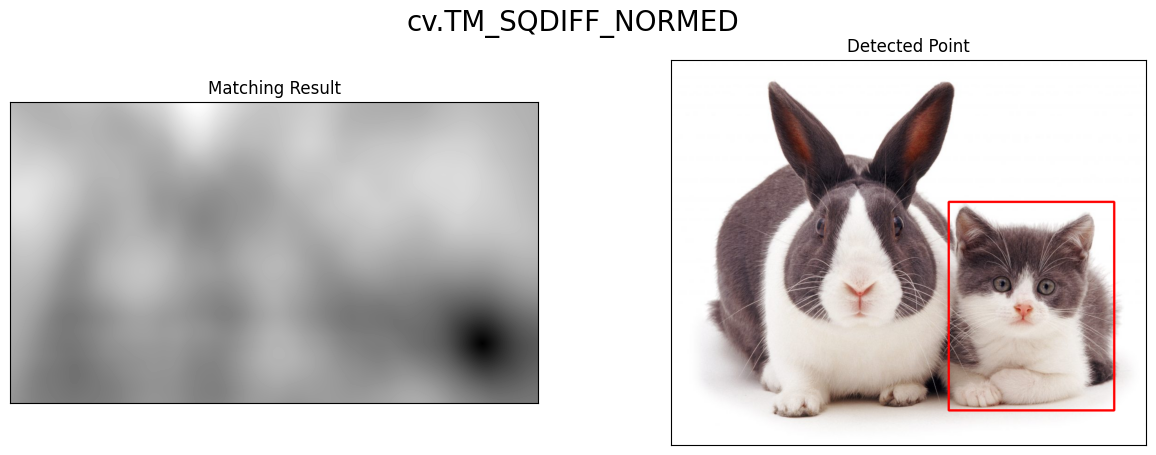

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/images/cats_and_bunnies.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/PCVK/images/cat2_templatejpg.jpg', 0)
w, h = template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5)) # membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img, top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

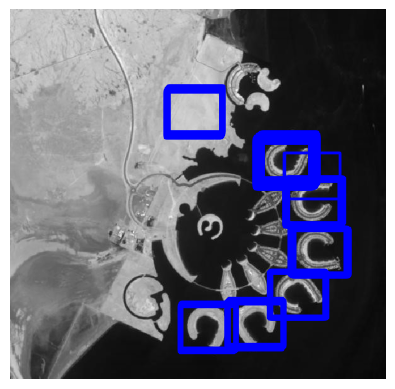

In [8]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import match_template
from skimage.color import rgb2gray

# Load the input image and template
image = rgb2gray(imread('/content/drive/MyDrive/PCVK/images/bahrain.jpg'))
template = rgb2gray(imread('/content/drive/MyDrive/PCVK/images/bahrain-template.jpg'))

# Hitung kemiripan citra dengan citra template
result = match_template(image, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.4
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='b', facecolor='none')
    ax.add_patch(rect)
plt.show()

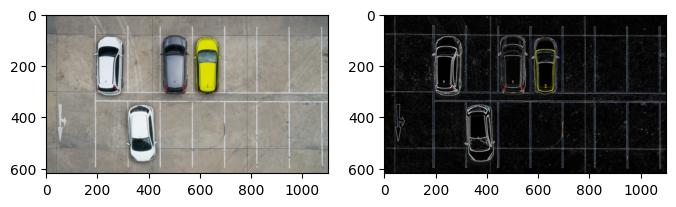

In [15]:
# load image
car_park = cv.imread('/content/drive/MyDrive/PCVK/images/car-park.jpg')
car_park_grey = cv.cvtColor(car_park, cv.COLOR_BGR2GRAY)

# remove noise
car_park = cv.GaussianBlur(car_park,(3,3),0)

# apply Sobel filter
sobelx = cv.Sobel(car_park, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(car_park, cv.CV_64F, 0, 1, ksize=3)

# perform thresholding to obtain edge image
edge_car = cv.addWeighted(cv.convertScaleAbs(sobelx), 0.5, cv.convertScaleAbs(sobely), 0.5, 0)


f, axarr = plt. subplots(1,2,figsize=(8,5))
axarr[0].imshow(cv.cvtColor(car_park, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(edge_car, cv.COLOR_BGR2RGB))
plt.show()

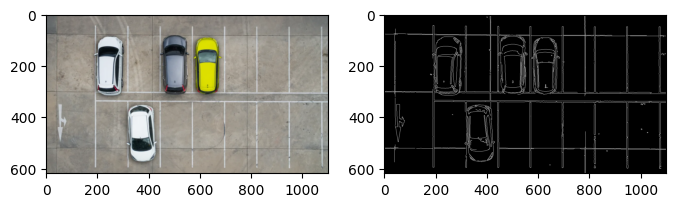

In [17]:
edge_canny = cv.Canny(car_park, 100, 200)

f, axarr = plt.subplots(1,2,figsize=(8,5))
axarr[0].imshow(cv.cvtColor(car_park, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(edge_canny, cv.COLOR_BGR2RGB))
plt.show()

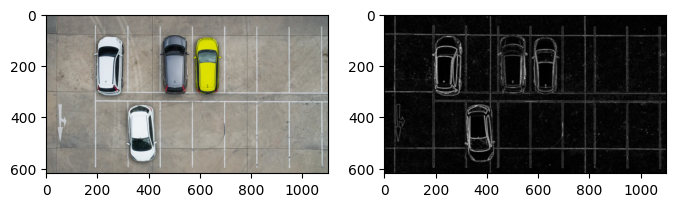

In [18]:
car_park = cv.imread('/content/drive/MyDrive/PCVK/images/car-park.jpg', cv.IMREAD_COLOR)

# # remove noise
car_park_gray = cv.cvtColor(car_park, cv.COLOR_BGR2GRAY)

# Reduce noise in image
img_car = cv.GaussianBlur(car_park_gray,(3,3),0)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img_car, ksize=3, ddepth=cv.CV_16S)
# converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)
# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(8,5))
axarr[0].imshow(cv.cvtColor(car_park, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))

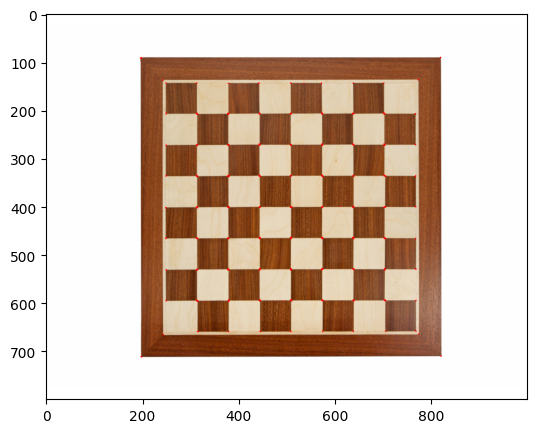

In [24]:
img_chessboard = cv.imread('/content/drive/MyDrive/PCVK/images/chess-board.jpg') 
chessboard_gray = cv.cvtColor(img_chessboard, cv.COLOR_BGR2GRAY)

dst = cv.cornerHarris(chessboard_gray,3,1,0.04)

chessboard_gray = np.float32(chessboard_gray) 
harris_output = cv.cornerHarris(chessboard_gray,2, 3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut 
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai 
img_chessboard[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(8,5)) 
plt.imshow(cv.cvtColor(img_chessboard, cv.COLOR_BGR2RGB))
plt.show()

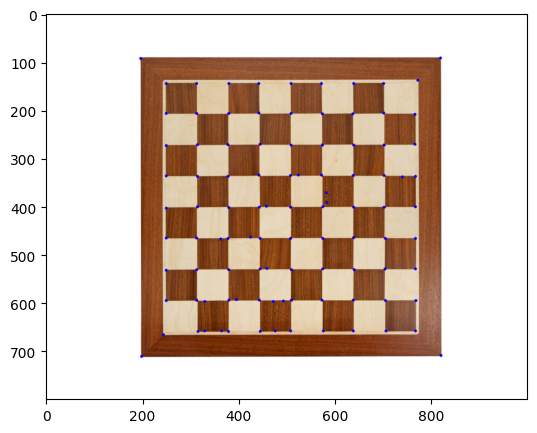

In [26]:
shi_tomasi = cv.goodFeaturesToTrack(chessboard_gray, 100,0.01,10) 
shi_tomasi = np. int0(shi_tomasi) 

for i in shi_tomasi:
    x,y = i.ravel() 
    cv.circle(img_chessboard, (x,y),3,255,-1)

plt.figure(figsize=(8,5)) 
plt.imshow(cv.cvtColor(img_chessboard, cv.COLOR_BGR2RGB))
plt.show()

number of Hough lines: 33


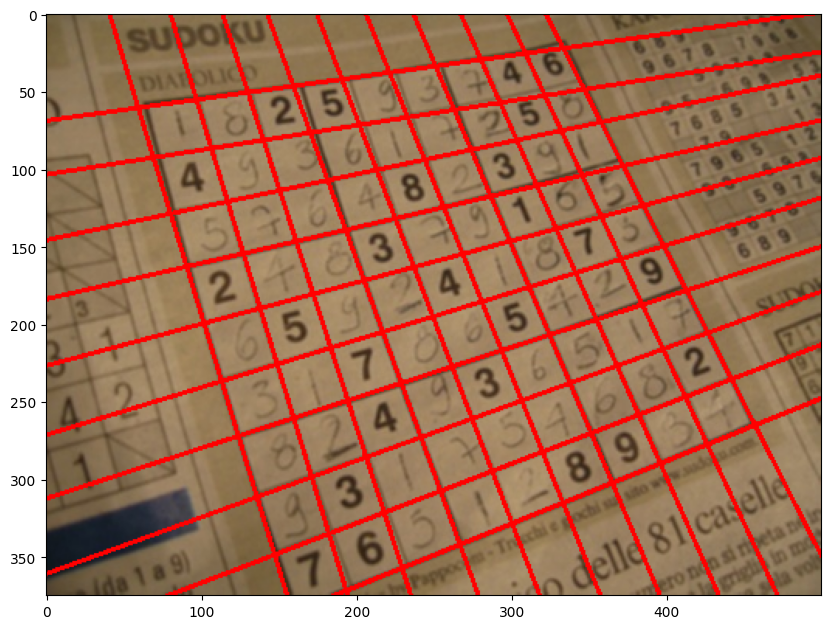

In [28]:
img_sudoku = cv.imread('/content/drive/MyDrive/PCVK/images/sudoku.jpg') 
sudoku_gray = cv.cvtColor(img_sudoku, cv.COLOR_BGR2GRAY)

edges = cv.Canny (sudoku_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges, kernel, iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges, 1, np.pi / 180, 150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(img_sudoku, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(10,8)) 
    plt.imshow(cv.cvtColor(img_sudoku, cv.COLOR_BGR2RGB))

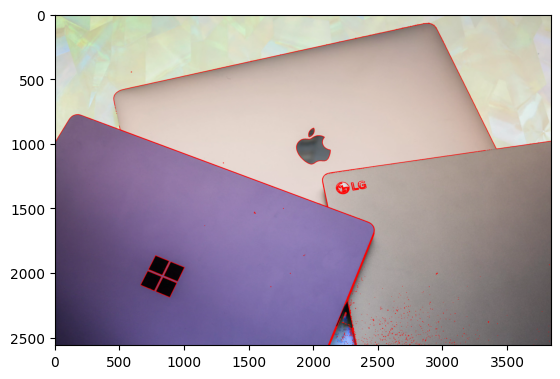

In [29]:
laptop = cv.imread('/content/drive/MyDrive/PCVK/images/laptop.jpg')
laptop_gray = cv.cvtColor(laptop, cv.COLOR_BGR2GRAY)

edges = cv.Canny(laptop_gray,100,100,apertureSize = 3)

ret, thresh = cv.threshold(laptop_gray, 127, 255, 0)
contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(laptop, contours, -1, (255,0,0), 4)

plt.imshow(laptop)
plt.show()